In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2>1.Import and preprocess the dataset.</h2>

In [3]:
df = pd.read_csv("C:/Users/ASUS_AMZAD/Downloads/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

<p> There are no duplicate data in dataset. But some columns contains null values.</p>

In [6]:
#Checking the columns with null values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# Dimensions and column list

print("Shape of the dataset:", df.shape)
print("Column names:", df.columns.tolist())

Shape of the dataset: (545, 13)
Column names: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [8]:
# Binary columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply mapping
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# Verify changes
print(df[binary_cols].head())

   mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0         1          0         0                0                1         1
1         1          0         0                0                1         0
2         1          0         1                0                0         1
3         1          0         1                0                1         1
4         1          1         1                0                1         0


In [9]:
# One-hot encode 'furnishingstatus', drop first to avoid multicollinearity
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Check new columns
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


In [10]:
# Confirm data after preprocessing
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

<h2>2.Split data into train-test sets.</h2>

In [11]:
# Define features and target

X = df[['area']]
y = df['price']

In [15]:
# Split into training and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (436, 1)
Test set size: (109, 1)


<h2>3.Fit a Linear Regression model using sklearn.linear_model.</h2>

In [17]:
#fit the model to the dataset

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [18]:
#Make prediction

y_pred = model.predict(X_test)

#printing only first 10 predictions
y_pred[1:10]

array([5279498.23656143, 4232202.82539203, 4640903.47365326,
       4198144.43803692, 5373158.80178796, 6139472.51727777,
       4636646.17523387, 3891618.951841  , 3661724.83719406])

<h2>4.Evaluate model using MAE, MSE, R².</h2>

In [19]:
#mean absolute error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1474748.1337969352


In [20]:
#mean squared error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3675286604768.185


In [21]:
#r2 squard

r2 = r2_score(y_test, y_pred)
print("R2 Squared:", r2)

R2 Squared: 0.27287851871974644


<h2>5.Plot regression line and interpret coefficients.</h2>

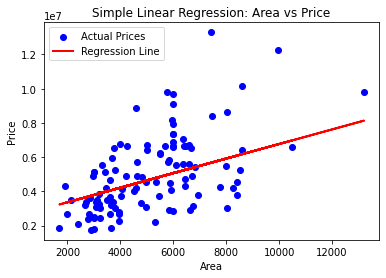

In [22]:
# Visualization

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()

In [23]:
#printing the model intecept and coefficients

print("Model Intercept:",model.intercept_)
print("Model Coefficients:", model.coef_)

Model Intercept: 2512254.2639593435
Model Coefficients: [425.72984194]
